### I load the data from my pc I download the data before that 

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('C:/Users/kagan/Desktop/Machine Learning for Engineers/train.csv')


### I arrange the randomness and shape of the data

In [2]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

### I define the relu,softmax,backward propagation and forward propagation here.

In [4]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

### I define the gradient descent here

In [5]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [6]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[6 4 8 ... 6 4 6] [6 9 2 ... 2 7 4]
0.06675609756097561
Iteration:  10
[6 4 0 ... 6 4 6] [6 9 2 ... 2 7 4]
0.1392439024390244
Iteration:  20
[6 4 0 ... 6 4 6] [6 9 2 ... 2 7 4]
0.18497560975609756
Iteration:  30
[0 4 0 ... 6 4 6] [6 9 2 ... 2 7 4]
0.2688048780487805
Iteration:  40
[0 4 0 ... 6 4 6] [6 9 2 ... 2 7 4]
0.32182926829268294
Iteration:  50
[0 4 0 ... 6 4 6] [6 9 2 ... 2 7 4]
0.3864390243902439
Iteration:  60
[0 4 0 ... 0 7 6] [6 9 2 ... 2 7 4]
0.4435609756097561
Iteration:  70
[0 4 0 ... 0 7 6] [6 9 2 ... 2 7 4]
0.4841463414634146
Iteration:  80
[6 4 0 ... 0 7 4] [6 9 2 ... 2 7 4]
0.5204146341463415
Iteration:  90
[6 4 0 ... 0 7 9] [6 9 2 ... 2 7 4]
0.5517317073170732
Iteration:  100
[6 4 0 ... 0 7 9] [6 9 2 ... 2 7 4]
0.5800975609756097
Iteration:  110
[6 4 0 ... 0 7 9] [6 9 2 ... 2 7 4]
0.6034634146341463
Iteration:  120
[6 4 0 ... 0 7 9] [6 9 2 ... 2 7 4]
0.6231219512195122
Iteration:  130
[6 4 0 ... 0 7 9] [6 9 2 ... 2 7 4]
0.6414634146341464
Iteration:  14

In [7]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [0]
Label:  6


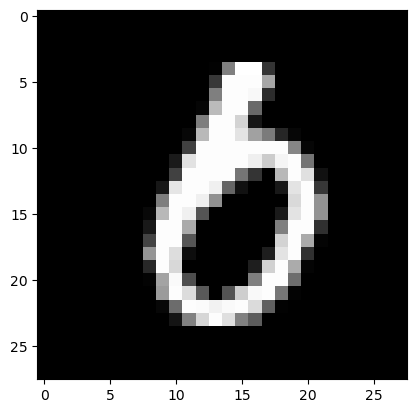

Prediction:  [4]
Label:  9


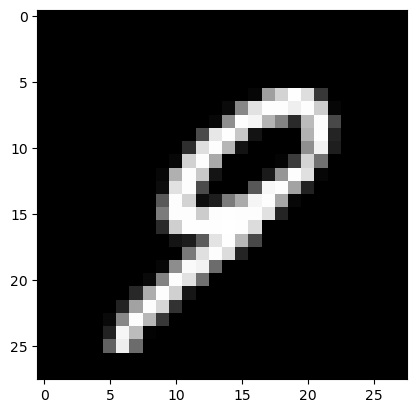

Prediction:  [2]
Label:  2


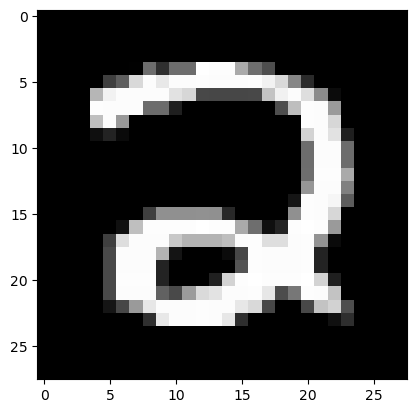

Prediction:  [7]
Label:  7


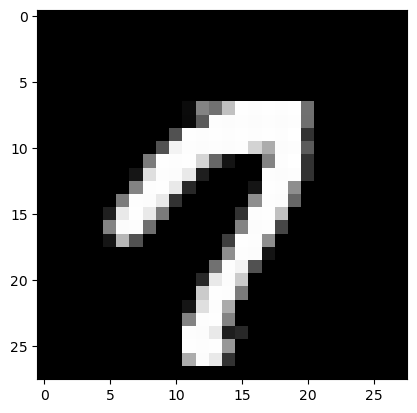

In [8]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [9]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[9 8 2 9 0 9 8 8 6 5 7 2 9 1 7 7 3 9 3 7 7 7 0 6 3 6 7 9 9 8 3 9 1 1 4 2 3
 1 1 4 9 2 1 8 1 5 5 2 0 9 9 9 8 9 9 6 3 0 2 4 9 1 7 7 9 9 0 5 9 8 4 7 7 0
 8 3 7 1 3 6 7 4 3 0 4 1 9 2 1 1 2 7 0 6 2 2 3 4 2 2 5 7 9 0 5 8 0 9 1 5 3
 0 5 9 6 5 8 4 8 7 9 1 3 5 2 0 7 8 4 8 9 5 0 1 5 3 9 7 2 6 3 3 3 3 1 8 8 1
 0 1 4 6 9 8 3 8 1 5 5 9 1 2 9 2 9 6 9 0 1 3 1 7 0 4 6 9 5 4 0 8 9 4 4 9 6
 1 0 2 2 2 1 8 0 9 2 9 3 6 4 2 0 6 1 3 5 9 2 7 0 8 5 8 6 2 7 8 8 1 9 7 3 9
 6 5 3 4 3 5 0 7 9 7 4 4 4 5 6 9 4 3 4 0 3 8 1 0 7 8 9 1 7 0 6 1 7 7 2 4 2
 6 6 6 1 5 6 7 3 6 0 9 2 4 8 5 3 2 9 4 2 5 1 2 2 4 3 1 2 6 6 6 2 1 6 9 2 0
 6 5 0 6 7 7 3 8 2 3 5 9 1 5 6 3 5 8 7 6 5 8 1 8 2 1 4 7 3 5 1 9 1 9 6 3 4
 6 8 4 9 0 7 7 6 0 2 0 2 1 3 7 7 8 0 6 1 8 3 3 9 5 3 3 3 6 1 3 9 4 0 0 2 6
 2 7 7 7 2 0 8 8 8 2 0 8 5 8 4 1 6 1 9 8 3 5 9 9 0 4 0 9 3 9 5 3 7 5 6 9 3
 2 2 4 7 6 6 7 4 3 0 8 7 8 9 5 9 4 9 7 9 6 7 8 7 6 8 9 7 7 1 0 5 7 8 7 1 0
 4 6 9 9 2 7 1 0 7 9 8 1 1 4 7 8 0 4 0 0 8 3 7 2 3 6 4 5 3 1 9 5 6 9 3 0 5
 7 5 2 5 7 9 3 9 2 9 9 3 

0.834

### I take some ideas from Andrew NG deep learning course which I have taken so many times ago.